In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For scaling and clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

df = pd.read_csv("ifood_df.csv")

# Quick exploration of the dataset structure and summary statistics
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  Accepte

In [4]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468  

In [5]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Missing values per column:
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegular

In [9]:
unique_values = df.nunique()
unique_values

Income                  1963
Kidhome                    3
Teenhome                   3
Recency                  100
MntWines                 775
MntFruits                158
MntMeatProducts          551
MntFishProducts          182
MntSweetProducts         176
MntGoldProds             212
NumDealsPurchases         15
NumWebPurchases           15
NumCatalogPurchases       13
NumStorePurchases         14
NumWebVisitsMonth         16
AcceptedCmp3               2
AcceptedCmp4               2
AcceptedCmp5               2
AcceptedCmp1               2
AcceptedCmp2               2
Complain                   2
Z_CostContact              1
Z_Revenue                  1
Response                   2
Age                       56
Customer_Days            662
marital_Divorced           2
marital_Married            2
marital_Single             2
marital_Together           2
marital_Widow              2
education_2n Cycle         2
education_Basic            2
education_Graduation       2
education_Mast

In [12]:
# Drop columns with all the same values
df.drop(columns=["Z_CostContact", "Z_Revenue"], inplace=True)

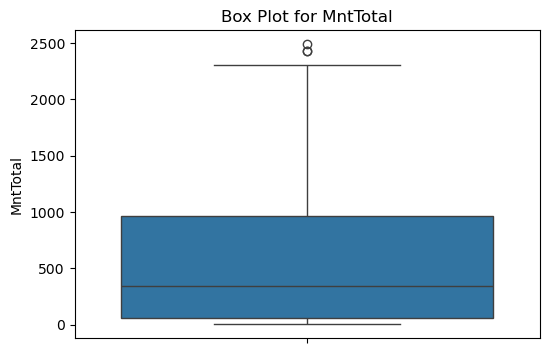

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, y="MntTotal")
plt.title("Box Plot for MntTotal")
plt.ylabel("MntTotal")
plt.show()

In [16]:
# Compute IQR and boundaries for MntTotal
Q1 = df['MntTotal'].quantile(0.25)
Q3 = df['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = df[(df['MntTotal'] > lower_bound) & (df['MntTotal'] < upper_bound)]
data.describe()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,...,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,...,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,...,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


C:\Users\akank\AppData\Local\Temp\ipykernel_10356\2350558391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, y="Income", palette="viridis")


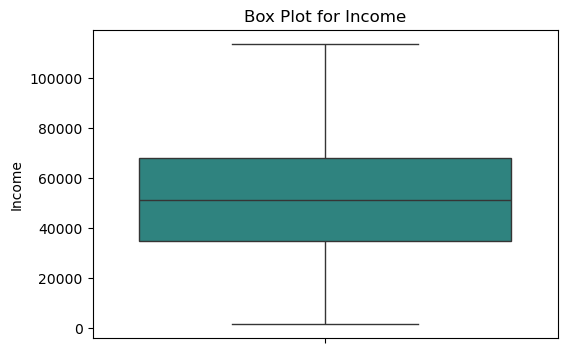

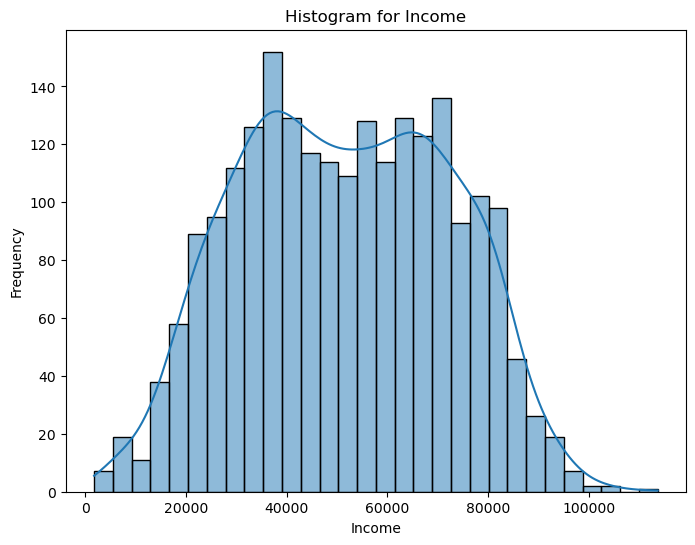

In [17]:
# Box plot for Income
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, y="Income", palette="viridis")
plt.title("Box Plot for Income")
plt.ylabel("Income")
plt.show()

# Histogram for Income
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="Income", bins=30, kde=True)
plt.title("Histogram for Income")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()


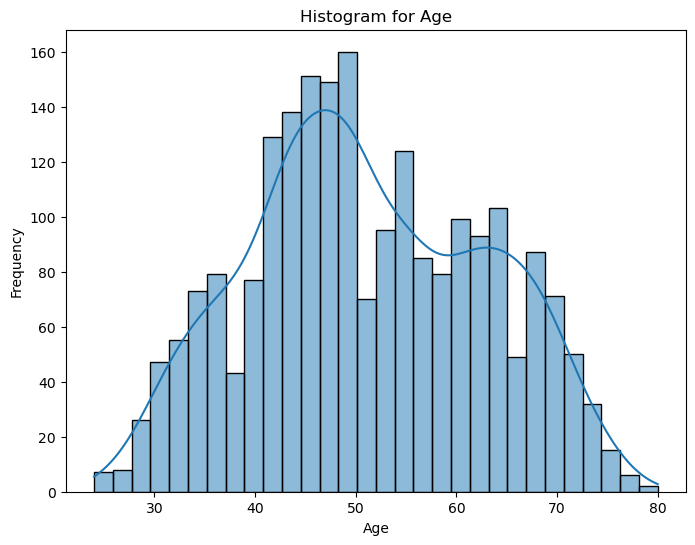

Skewness: 0.091227
Kurtosis: -0.796125


In [18]:
# Histogram for Age
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x="Age", bins=30, kde=True)
plt.title("Histogram for Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Skewness and Kurtosis for Age
print("Skewness: %f" % data["Age"].skew())
print("Kurtosis: %f" % data["Age"].kurt())


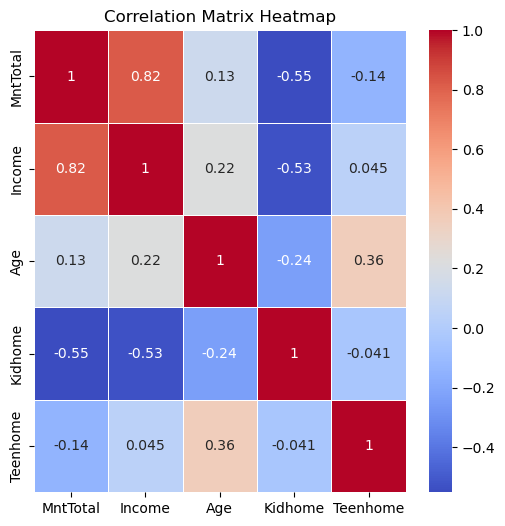

In [19]:
# Define groups of columns for analysis
cols_demographics = ['Income', 'Age']
cols_children = ['Kidhome', 'Teenhome']
cols_mnt = ['MntTotal', 'MntRegularProds', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Compute correlation matrix for demographics and MntTotal
corr_matrix = data[['MntTotal'] + cols_demographics + cols_children].corr()

# Plot heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [22]:
from scipy.stats import pointbiserialr
# Correlations with Marital Status
cols_marital = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']

for col in cols_marital:
    correlation, p_value = pointbiserialr(df[col], df['MntTotal'])
    print(f"{correlation:.4f}: Point-Biserial Correlation for {col} (p-value: {p_value:.4f})")

0.0037: Point-Biserial Correlation for marital_Divorced (p-value: 0.8612)
-0.0223: Point-Biserial Correlation for marital_Married (p-value: 0.2963)
0.0059: Point-Biserial Correlation for marital_Single (p-value: 0.7804)
0.0016: Point-Biserial Correlation for marital_Together (p-value: 0.9393)
0.0359: Point-Biserial Correlation for marital_Widow (p-value: 0.0921)


C:\Users\akank\AppData\Local\Temp\ipykernel_10356\63821634.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(marital_corr.keys()), y=list(marital_corr.values()), palette="viridis")


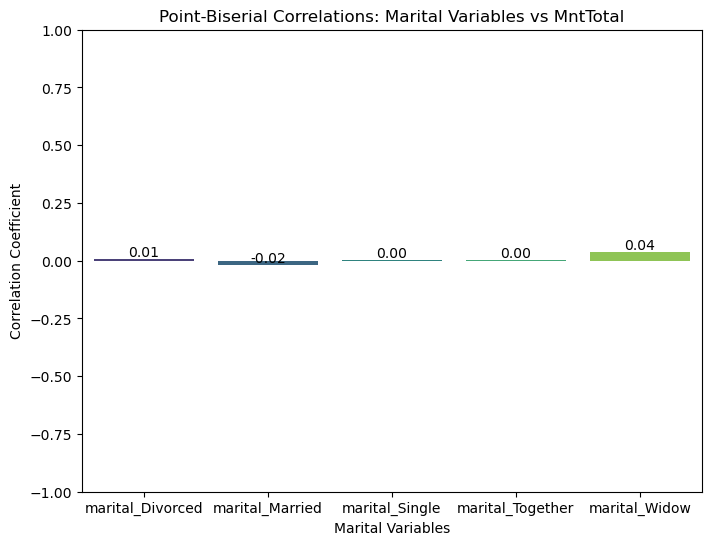

In [25]:
# Compute correlations only for binary marital variables.
marital_corr = {}
for col in cols_marital:
    if col in df.columns and df[col].nunique() == 2:
        corr_value, _ = pointbiserialr(data[col], data['MntTotal'])
        marital_corr[col] = corr_value

# Create a bar plot of the correlations.
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=list(marital_corr.keys()), y=list(marital_corr.values()), palette="viridis")
plt.title("Point-Biserial Correlations: Marital Variables vs MntTotal")
plt.xlabel("Marital Variables")
plt.ylabel("Correlation Coefficient")
plt.ylim(-1,1)
for i, val in enumerate(list(marital_corr.values())):
    ax.text(i, val, f"{val:.2f}", ha='center', va='bottom')
plt.show()


C:\Users\akank\AppData\Local\Temp\ipykernel_10356\3277327836.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=list(edu_corr.keys()), y=list(edu_corr.values()), palette="coolwarm")


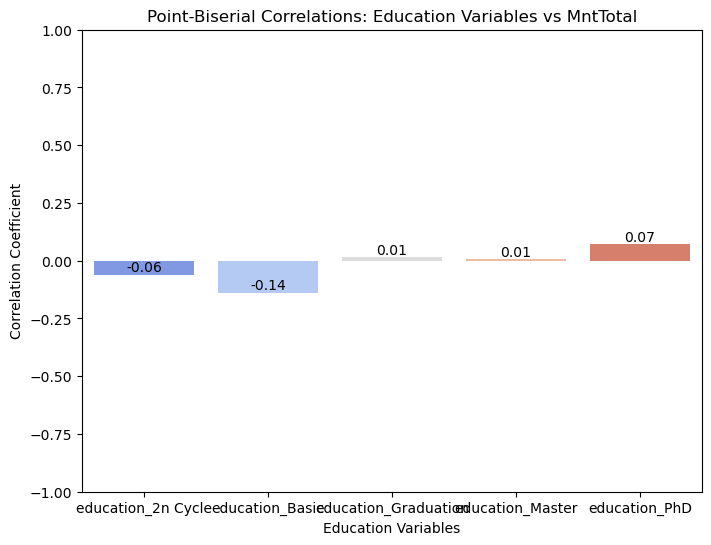

In [35]:
# Compute correlations only for binary education variables.
edu_corr = {}
for col in cols_education:
    if col in df.columns and data[col].nunique() == 2:
        corr_value, _ = pointbiserialr(df[col], df['MntTotal'])
        edu_corr[col] = corr_value

# Create a bar plot of the correlations.
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=list(edu_corr.keys()), y=list(edu_corr.values()), palette="coolwarm")
plt.title("Point-Biserial Correlations: Education Variables vs MntTotal")
plt.xlabel("Education Variables")
plt.ylabel("Correlation Coefficient")
plt.ylim(-1,1)
for i, val in enumerate(list(edu_corr.values())):
    ax.text(i, val, f"{val:.2f}", ha='center', va='bottom')
plt.show()


C:\Users\akank\AppData\Local\Temp\ipykernel_10356\1869011143.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Marital'] = data.apply(get_marital_status, axis=1)
C:\Users\akank\AppData\Local\Temp\ipykernel_10356\1869011143.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['In_relationship'] = data.apply(get_relationship, axis=1)


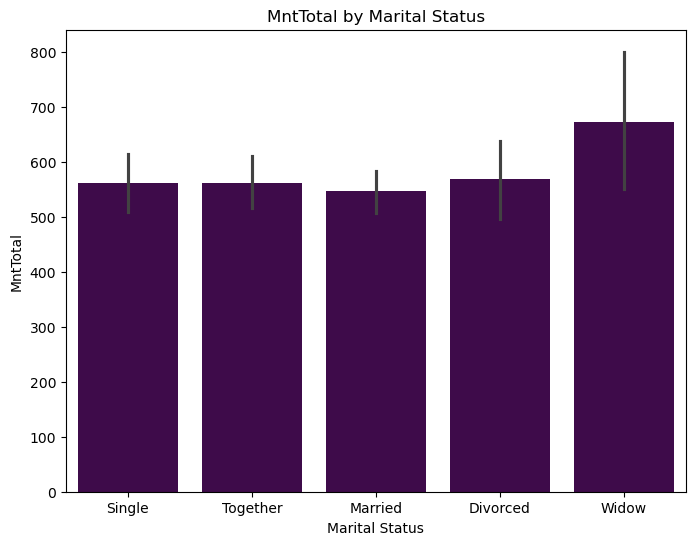

In [29]:
# Create a new feature "Marital" based on the 5 existing marital status columns.
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'

data['Marital'] = data.apply(get_marital_status, axis=1)

# Create a new binary feature "In_relationship"
def get_relationship(row):
    if row['marital_Married'] == 1 or row['marital_Together'] == 1:
        return 1
    else:
        return 0

data['In_relationship'] = data.apply(get_relationship, axis=1)


plt.figure(figsize=(8, 6))
# Use a fixed color since we're only plotting one group per category.
sns.barplot(x='Marital', y='MntTotal', data=data, color="#440154")
plt.title('MntTotal by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('MntTotal')
plt.show()


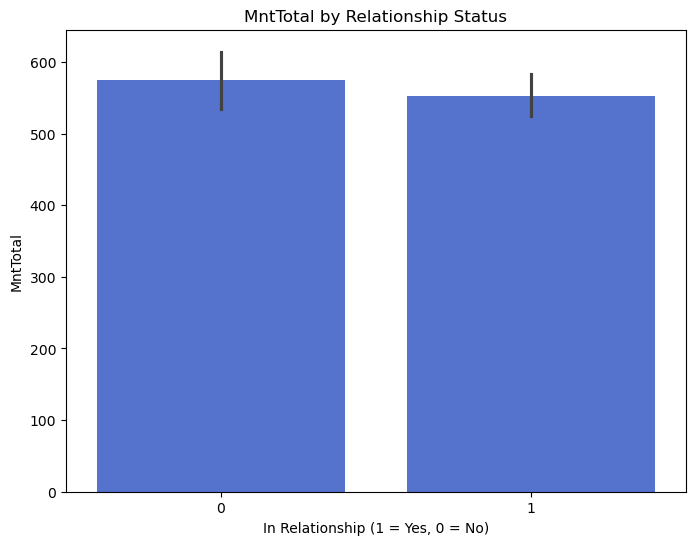

C:\Users\akank\AppData\Local\Temp\ipykernel_10356\1387468525.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='In_relationship', data=data, palette="Set2")


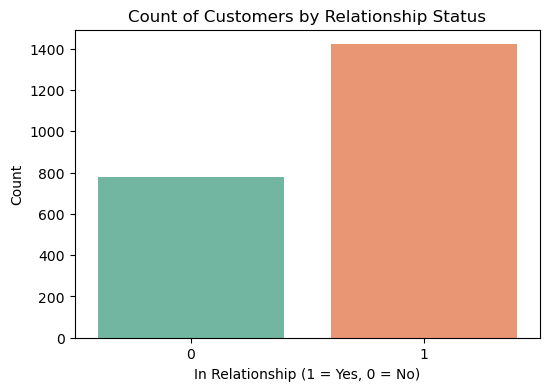

In [30]:
# Bar plot of average MntTotal by In_relationship status.
plt.figure(figsize=(8, 6))
sns.barplot(x='In_relationship', y='MntTotal', data=data, color="royalblue")
plt.title('MntTotal by Relationship Status')
plt.xlabel('In Relationship (1 = Yes, 0 = No)')
plt.ylabel('MntTotal')
plt.show()

# Count plot of the number of customers by In_relationship status.
plt.figure(figsize=(6, 4))
sns.countplot(x='In_relationship', data=data, palette="Set2")
plt.title('Count of Customers by Relationship Status')
plt.xlabel('In Relationship (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

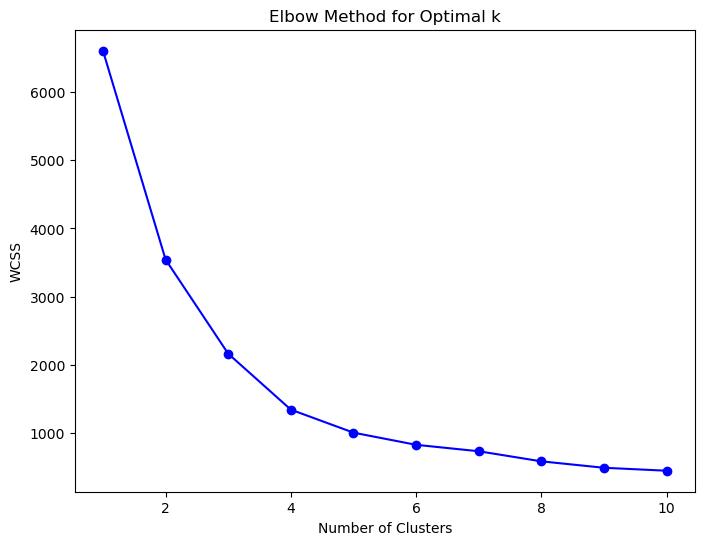

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Define the columns to use for clustering.
cols_for_clustering = ['Income', 'MntTotal', 'In_relationship']

# Make a copy of the data and standardize the chosen features.
data_scaled = data.copy()
scaler = StandardScaler()
data_scaled[cols_for_clustering] = scaler.fit_transform(data[cols_for_clustering])

# (Optional) Display summary statistics for the scaled features.
data_scaled[cols_for_clustering].describe()

wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled[cols_for_clustering])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, wcss, marker="o", linestyle="-", color='b')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

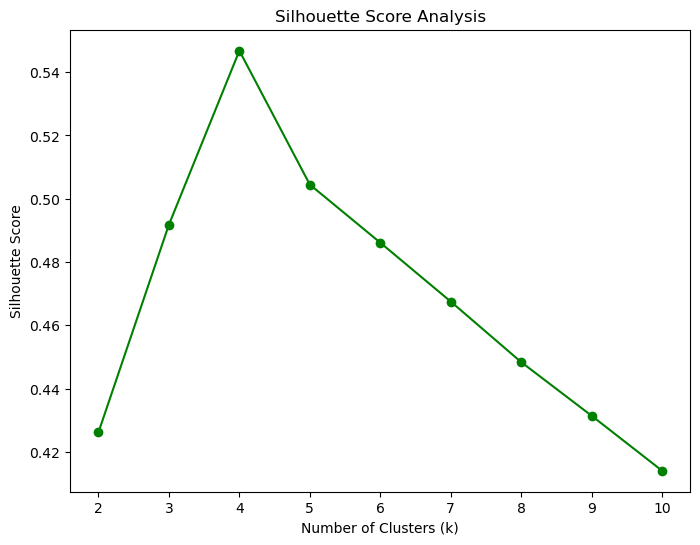

In [32]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled[cols_for_clustering])
    silhouette_avg = silhouette_score(data_scaled[cols_for_clustering], cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker="o", linestyle="-", color='g')
plt.title("Silhouette Score Analysis")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


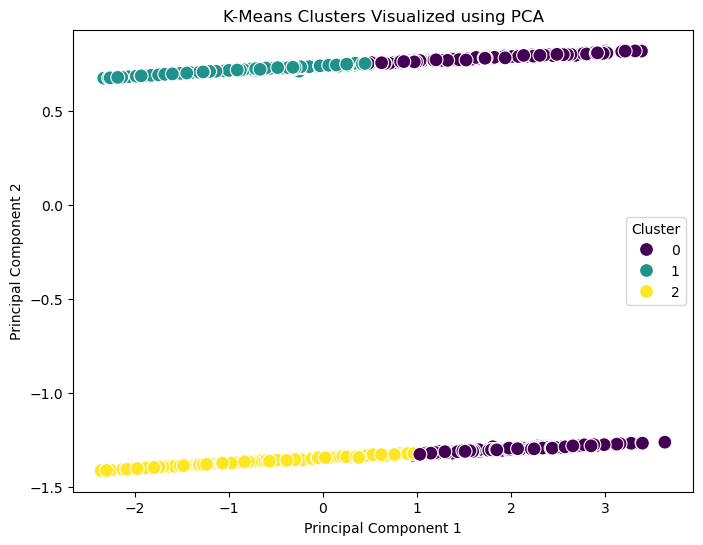

In [33]:
from sklearn.decomposition import PCA

# Apply PCA on the scaled features.
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pca1'] = pca_components[:, 0]
data_scaled['pca2'] = pca_components[:, 1]

# Assume from the Elbow/Silhouette analysis that 3 clusters is optimal.
optimal_k = 3
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
data_scaled['cluster'] = kmeans_final.fit_predict(data_scaled[cols_for_clustering])

# Plot the clusters in a 2D PCA space.
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=data_scaled, palette="viridis", s=100)
plt.title("K-Means Clusters Visualized using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

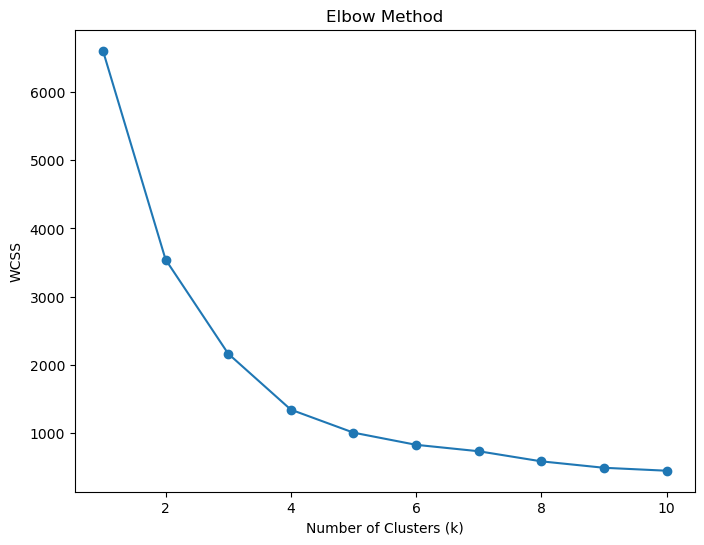

C:\Users\akank\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\akank\AppData\Local\Temp\ipykernel_10356\732724805.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = data_scaled['Cluster']


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,Marital,In_relationship,Cluster
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,1,0,0,1529,1441,0,Single,0,2
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,1,0,0,21,15,0,Single,0,3
2,71613.0,0,0,26,426,49,127,111,21,42,...,0,1,0,0,734,692,0,Together,1,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,0,1,0,0,48,43,0,Together,1,1
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,1,407,392,0,Married,1,1


In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

# Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled[cols_for_clustering])
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

# Perform K-Means clustering with the optimal number of clusters (assume k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
data_scaled['Cluster'] = kmeans.fit_predict(data_scaled[cols_for_clustering])

# Add cluster labels to the original dataframe
data['Cluster'] = data_scaled['Cluster']

# Display the first few rows with cluster labels
data.head()


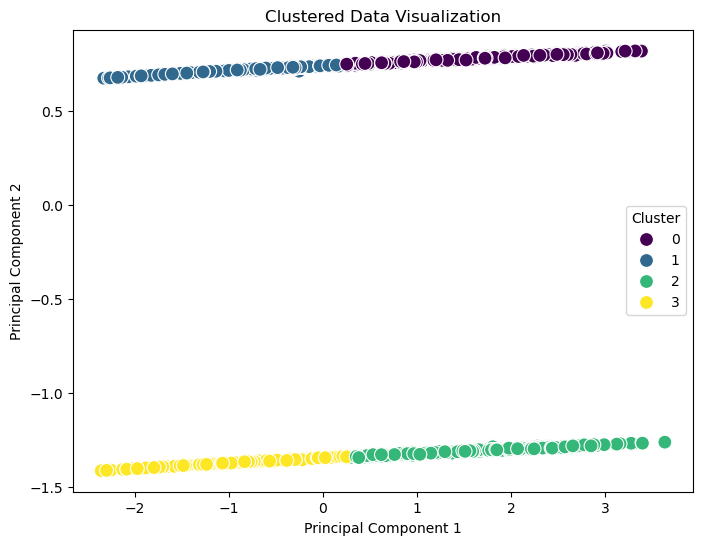

In [37]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled[cols_for_clustering])
data_scaled['pc1'] = pca_components[:, 0]
data_scaled['pc2'] = pca_components[:, 1]

# Plot clusters in the PCA space
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pc1', y='pc2', hue='Cluster', data=data_scaled, palette='viridis', s=100)
plt.title('Clustered Data Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


               Income     MntTotal  In_relationship
Cluster                                            
0        71914.598930  1153.197861              1.0
1        38027.656977   160.412791              1.0
2        71946.155488  1159.612805              0.0
3        37332.339956   150.761589              0.0


C:\Users\akank\AppData\Local\Temp\ipykernel_10356\1429108880.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cluster', y='Consumption', hue='Product', data=mnt_melted, palette='viridis', ci=None)


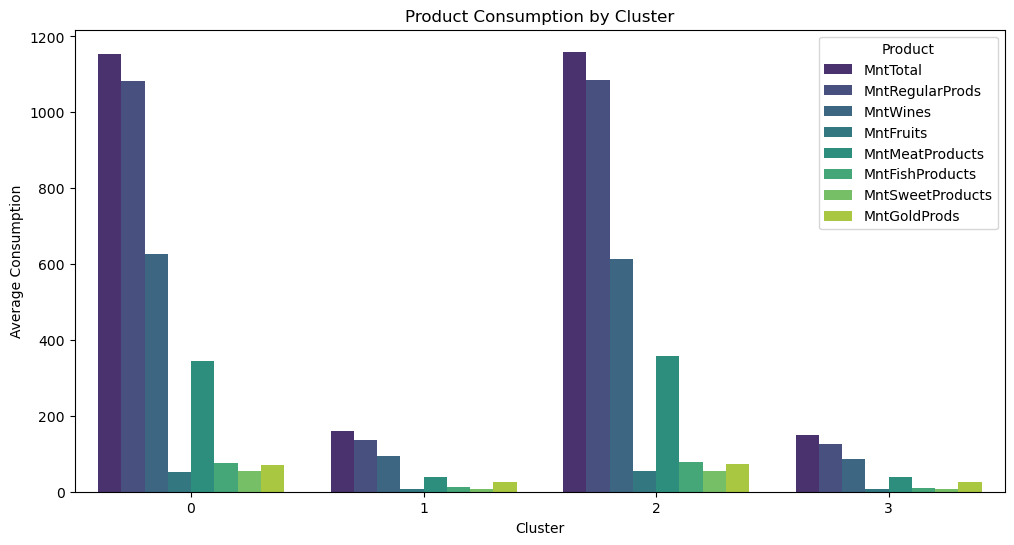

C:\Users\akank\AppData\Local\Temp\ipykernel_10356\1429108880.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Count', data=cluster_sizes, palette='viridis')


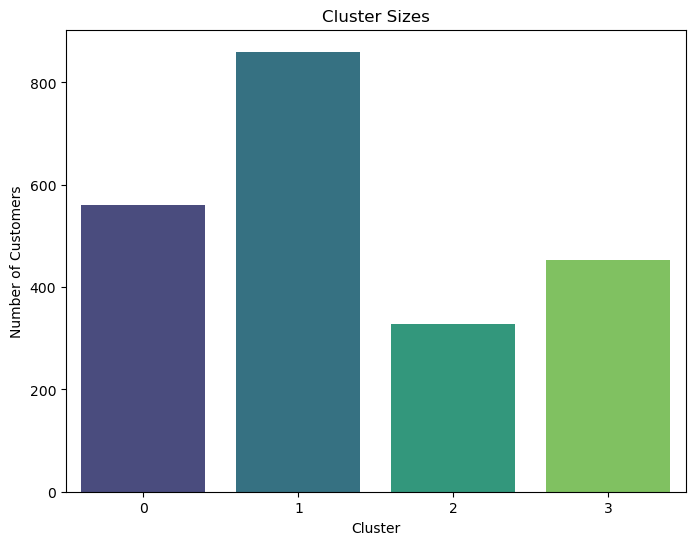

C:\Users\akank\AppData\Local\Temp\ipykernel_10356\1429108880.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Income', data=data, palette='viridis')


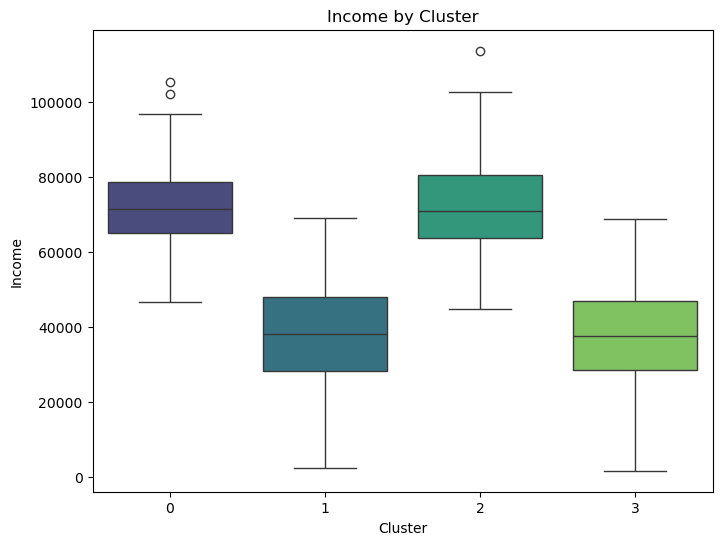

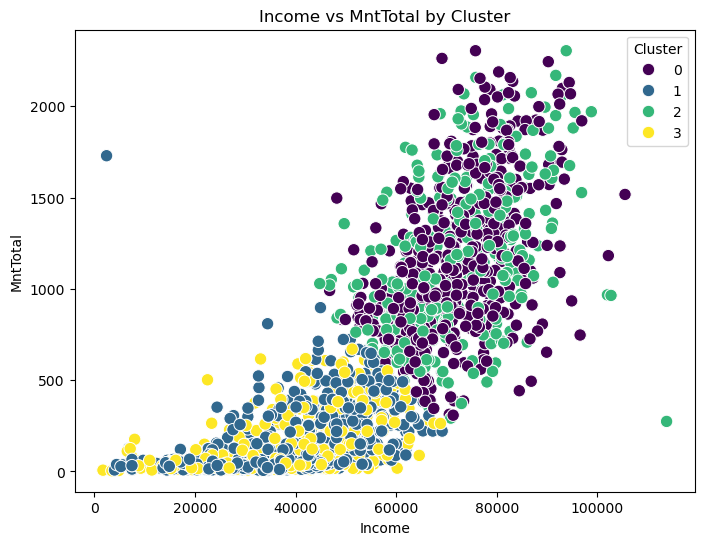

In [38]:
# Mean values of clustering features
cluster_means = data.groupby('Cluster')[cols_for_clustering].mean()
print(cluster_means)

# Mean consumption of different product types
cols_mnt = ['MntTotal', 'MntRegularProds', 'MntWines', 'MntFruits', 
            'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
mnt_means = data.groupby('Cluster')[cols_mnt].mean()

# Melt for plotting
mnt_melted = pd.melt(mnt_means.reset_index(), id_vars='Cluster', var_name='Product', value_name='Consumption')

# Plot product consumption by cluster
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster', y='Consumption', hue='Product', data=mnt_melted, palette='viridis', ci=None)
plt.title('Product Consumption by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Consumption')
plt.legend(title='Product', loc='upper right')
plt.show()

# Cluster sizes
cluster_sizes = data['Cluster'].value_counts().reset_index()
cluster_sizes.columns = ['Cluster', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(x='Cluster', y='Count', data=cluster_sizes, palette='viridis')
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

# Income distribution by cluster (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Income', data=data, palette='viridis')
plt.title('Income by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Income')
plt.show()

# Scatterplot of Income vs. MntTotal by cluster
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntTotal', hue='Cluster', data=data, palette='viridis', s=80)
plt.title('Income vs MntTotal by Cluster')
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.legend(title='Cluster')
plt.show()